In [176]:
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

from collections import defaultdict
import numpy as np

In [2]:
ozone_19 = pd.read_csv('ozone-19.csv')
ozone_20 = pd.read_csv('ozone-20.csv')
ozone_21 = pd.read_csv('ozone-21.csv')

pm_19 = pd.read_csv('pm25-19.csv')
pm_20 = pd.read_csv('pm25-20.csv')
pm_21 = pd.read_csv('pm25-21.csv')

In [23]:
ozone_21.head()

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2021,AQS,60010007,1,0.024,ppm,22,Livermore,17,100.0,44201,Ozone,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
1,01/02/2021,AQS,60010007,1,0.013,ppm,12,Livermore,17,100.0,44201,Ozone,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
2,01/03/2021,AQS,60010007,1,0.018,ppm,17,Livermore,17,100.0,44201,Ozone,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
3,01/04/2021,AQS,60010007,1,0.034,ppm,31,Livermore,17,100.0,44201,Ozone,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
4,01/05/2021,AQS,60010007,1,0.027,ppm,25,Livermore,17,100.0,44201,Ozone,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217


In [134]:
sites = set(pm_19['Site Name'])

def get_mean(name, datasource, key):
    d = {}
    for site, data in datasource.groupby(by='COUNTY'):
        march = data[data.Date.str.startswith('06')]
        d[site] = march[key].mean()
    return d
    
    
d1 = get_mean('2019', pm_19, key='Daily Mean PM2.5 Concentration')
d2 = get_mean('2020', pm_20, key='Daily Mean PM2.5 Concentration')
d3 = get_mean('2021', pm_21, key='Daily Mean PM2.5 Concentration')

columns = ['year', 'county', 'value']
rows = [('2019', key, value) for key, value in d1.items()]
rows += [('2020', key, value) for key, value in d2.items()]
rows += [('2021', key, value) for key, value in d3.items()]

df = pd.DataFrame(rows, columns=columns)

In [127]:
df.head()

,year,county,value
0,2019,Alameda,8.157778
1,2019,Butte,6.151376
2,2019,Calaveras,5.110000
3,2019,Colusa,6.044444
4,2019,Contra Costa,8.182857


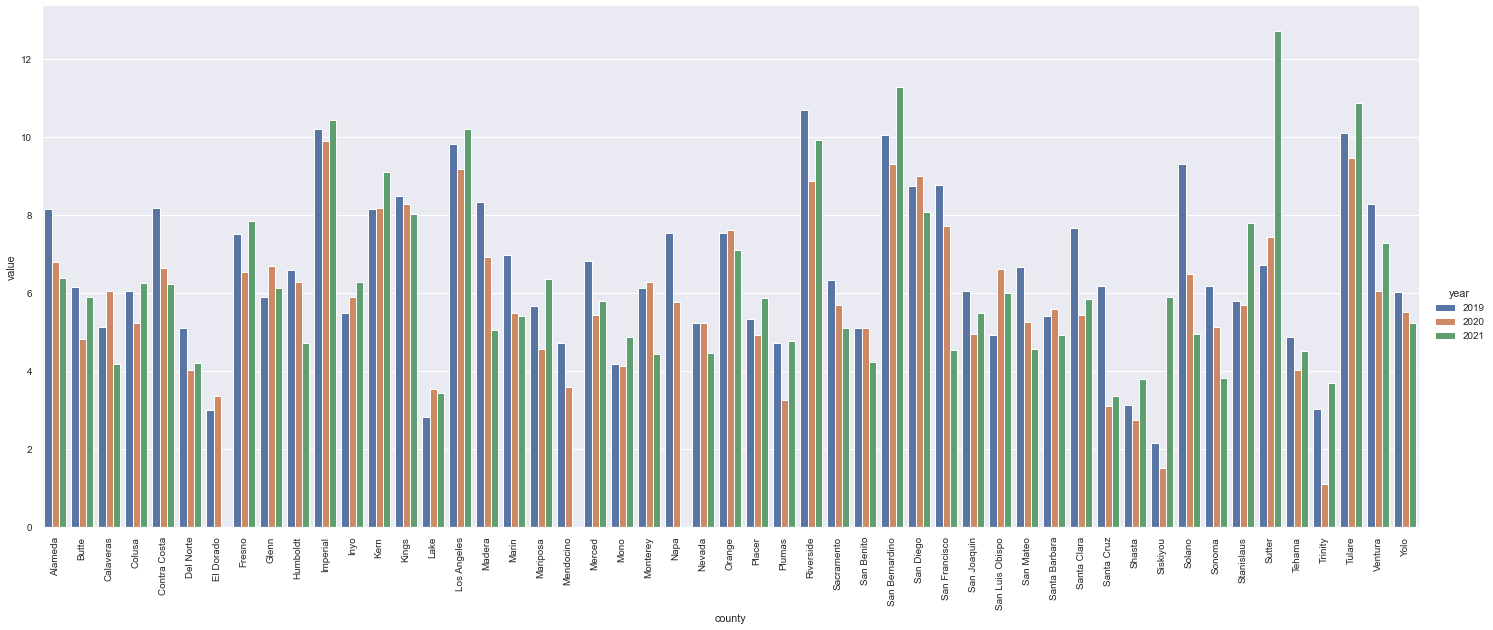

In [128]:
ax = sns.catplot(x='county', y='value', hue='year', data=df, kind='bar', height=8, aspect=20/8)
ax.set_xticklabels(df.county[:51], rotation=90)
print()

In [ ]:
## plt.figure(figsize=(22, 5))
sns.set(font_scale = 0.9)

ax = sns.lineplot(x=[x for x in d1.keys()], y=[x for x in d1.values()], color='b')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax = sns.lineplot(x=[x for x in d2.keys()], y=[x for x in d2.values()], color='g')

ax = sns.lineplot(x=[x for x in d3.keys()], y=[x for x in d3.values()], color='r')
ax.set_ylabel("pm2.5 concentration", fontsize = 20)
ax.set_xticklabels(d3.keys(),rotation = 90)
print()

In [130]:
o1 = get_mean('2019', ozone_19, 'Daily Max 8-hour Ozone Concentration')
o2 = get_mean('2020', ozone_20, 'Daily Max 8-hour Ozone Concentration')
o3 = get_mean('2021', ozone_21, 'Daily Max 8-hour Ozone Concentration')

columns = ['year', 'county', 'value']
rows = [('2019', key, value) for key, value in o1.items()]
rows += [('2020', key, value) for key, value in o2.items()]
rows += [('2021', key, value) for key, value in o3.items()]

df = pd.DataFrame(rows, columns=columns)

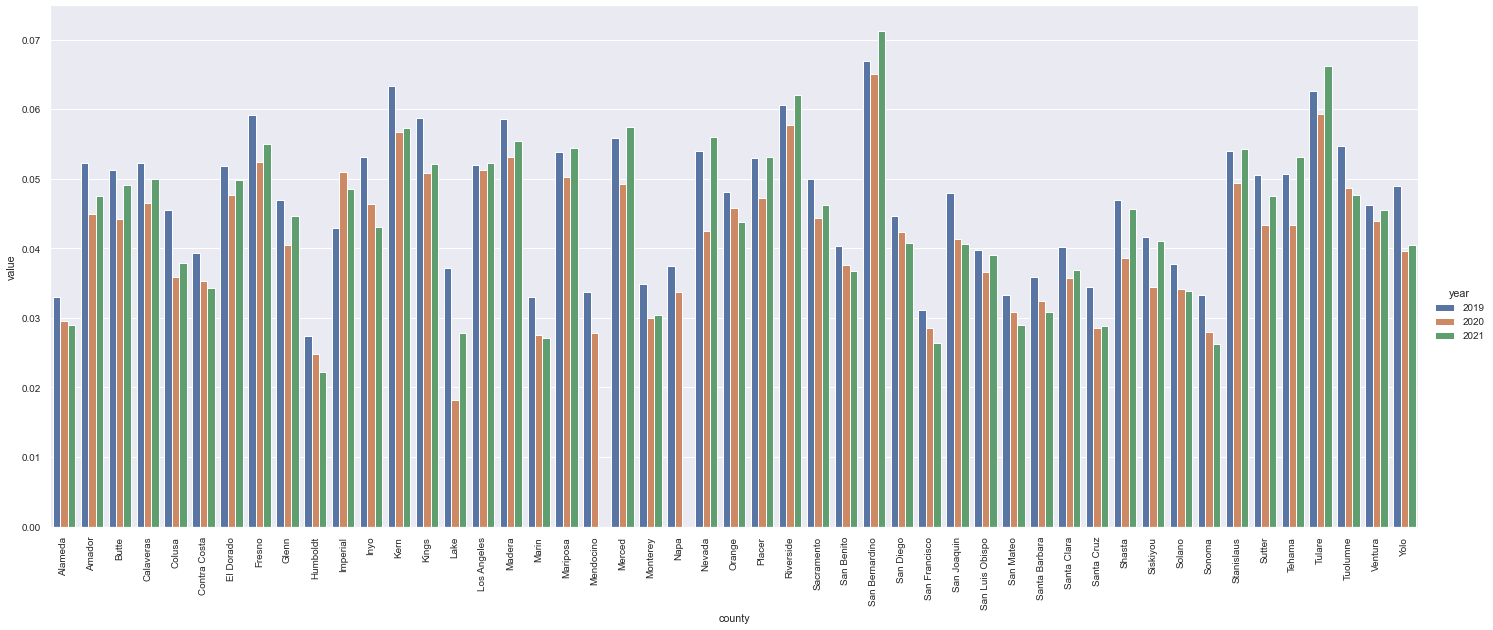

In [132]:
ax = sns.catplot(x='county', y='value', hue='year', data=df, kind='bar', height=8, aspect=20/8)
ax.set_xticklabels(df.county[:49], rotation=90)
print()

/var/folders/vm/3klq9ws57lv3xsf2yb4311pc0000gn/T/ipykernel_1589/3809405154.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(d3.keys(),rotation = 90)


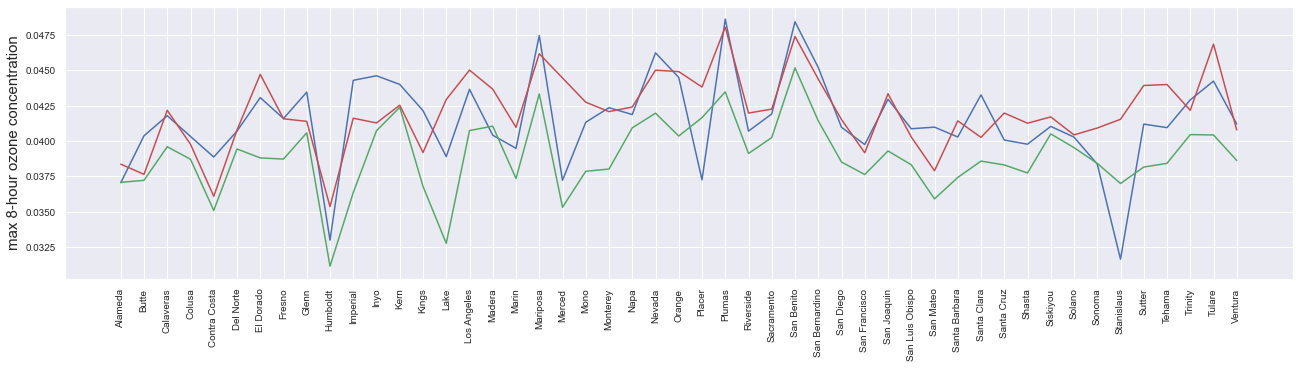

In [49]:
plt.figure(figsize=(22, 5))
sns.set(font_scale = 0.9)

ax = sns.lineplot(x=[x for x in o1.keys()], y=[x for x in o1.values()], color='b')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax = sns.lineplot(x=[x for x in o2.keys()], y=[x for x in o2.values()], color='g')

ax = sns.lineplot(x=[x for x in o3.keys()], y=[x for x in o3.values()], color='r')
ax.set_ylabel("max 8-hour ozone concentration", fontsize = 15)
ax.set_xticklabels(d3.keys(),rotation = 90)
print()

In [169]:
# Get mean for each county for each year
groups = df.groupby(by=['year', 'county'])

d = defaultdict(list)


for (year, county), data in df.groupby(by=['year', 'county']):
    # print(year, county, data.mean().value)
    d[county] += [data.mean().value]

/var/folders/vm/3klq9ws57lv3xsf2yb4311pc0000gn/T/ipykernel_1589/1773518579.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  d[county] += [data.mean().value]


In [181]:
tot_19_20 = 0.0
tot_20_21 = 0.0

count = 0

for county, vals in d.items():
    if len(vals) < 3 or str(vals[2]) == 'nan':
        continue
    
    tot_19_20 += (vals[1] - vals[0]) / vals[1]
    tot_20_21 += (vals[2] - vals[1]) / vals[2]
    count += 1
    
print(tot_19_20 / count)
print(tot_20_21 / count)

-0.16949833891558164
0.01729476168738071


In [168]:
count

50